### 3d Vizualization of a Convolution Neural Network
https://www.cs.ryerson.ca/~aharley/vis/conv/

https://tensorspace.org/html/playground/index.html

https://poloclub.github.io/cnn-explainer/

# What are Convolutional Neural Networks?

Convolutional Neural Networks (ConvNets or CNNs) are a category of Neural Networks that have proven very effective in areas such as image recognition and classification. ConvNets have been successful in identifying faces, objects and traffic signs apart from powering vision in robots and self driving cars.


A Convolutional Neural Network (CNN) is comprised of one or more convolutional layers (often with a subsampling step) and then followed by one or more fully connected layers as in a standard multilayer neural network. The architecture of a CNN is designed to take advantage of the 2D structure of an input image (or other 2D input such as a speech signal). This is achieved with local connections and tied weights followed by some form of pooling which results in translation invariant features. Another benefit of CNNs is that they are easier to train and have many fewer parameters than fully connected networks with the same number of hidden units. In this article we will discuss the architecture of a CNN and the back propagation algorithm to compute the gradient with respect to the parameters of the model in order to use gradient based optimization. 

## Intuition

Let's develop better intuition for how Convolutional Neural Networks (CNN) work. We'll examine how humans classify images, and then see how CNNs use similar approaches.

Let’s say we wanted to classify the following image of a dog as a Golden Retriever:

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377b77_dog-1210559-1280/dog-1210559-1280.jpg" width="500" height="500">

As humans, how do we do this?

One thing we do is that we identify certain parts of the dog, such as the nose, the eyes, and the fur. We essentially break up the image into smaller pieces, recognize the smaller pieces, and then combine those pieces to get an idea of the overall dog.

In this case, we might break down the image into a combination of the following:

* A nose
* Two eyes
* Golden fur

These pieces can be seen below:


<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bdb_screen-shot-2016-11-24-at-12.49.08-pm/screen-shot-2016-11-24-at-12.49.08-pm.png" width="250" height="250">
<center>The eye of the dog.</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bed_screen-shot-2016-11-24-at-12.49.43-pm/screen-shot-2016-11-24-at-12.49.43-pm.png" width="250" height="250">
<center>The nose of the dog.</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377bff_screen-shot-2016-11-24-at-12.50.54-pm/screen-shot-2016-11-24-at-12.50.54-pm.png" width="250" height="250">
<center>The fur of the dog.</center>

### Going One Step Further

But let’s take this one step further. How do we determine what exactly a nose is? A Golden Retriever nose can be seen as an oval with two black holes inside it. Thus, one way of classifying a Retriever’s nose is to to break it up into smaller pieces and look for black holes (nostrils) and curves that define an oval as shown below:

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c52_screen-shot-2016-11-24-at-12.51.47-pm/screen-shot-2016-11-24-at-12.51.47-pm.png">
<center>A curve that we can use to determine a nose</center>
<br>

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377c68_screen-shot-2016-11-24-at-12.51.51-pm/screen-shot-2016-11-24-at-12.51.51-pm.png">
<center>A nostril that we can use to classify the nose of the dog</center>

Broadly speaking, this is what a CNN learns to do. It learns to recognize basic lines and curves, then shapes and blobs, and then increasingly complex objects within the image. Finally, the CNN classifies the image by combining the larger, more complex objects.

In our case, the levels in the hierarchy are:

* Simple shapes, like ovals and dark circles
* Complex objects (combinations of simple shapes), like eyes, nose, and fur
* The dog as a whole (a combination of complex objects)

With deep learning, we don't actually program the CNN to recognize these specific features. Rather, the CNN learns on its own to recognize such objects through forward propagation and backpropagation!

It's amazing how well a CNN can learn to classify images, even though we never program the CNN with information about specific features to look for.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cb19d_heirarchy-diagram/heirarchy-diagram.jpg)
<center>An example of what each layer in a CNN might recognize when classifying a picture of a dog</center>

A CNN might have several layers, and each layer might capture a different level in the hierarchy of objects. The first layer is the lowest level in the hierarchy, where the CNN generally classifies small parts of the image into simple shapes like horizontal and vertical lines and simple blobs of colors. The subsequent layers tend to be higher levels in the hierarchy and generally classify more complex ideas like shapes (combinations of lines), and eventually full objects like dogs.

Once again, the CNN **learns all of this on its own**. We don't ever have to tell the CNN to go looking for lines or curves or noses or fur. The CNN just learns from the training set and discovers which characteristics of a Golden Retriever are worth looking for.

## Convolution and Cross-Correlation
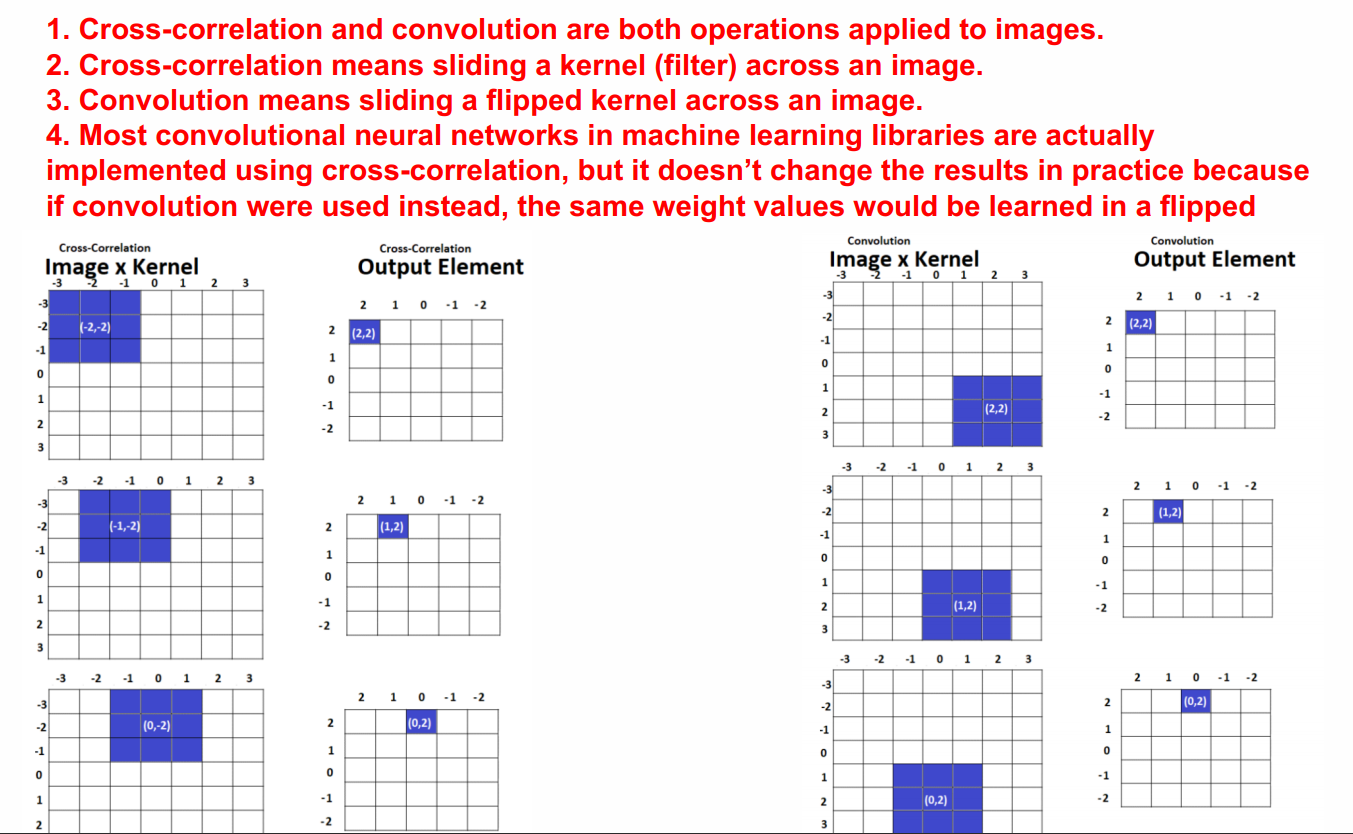

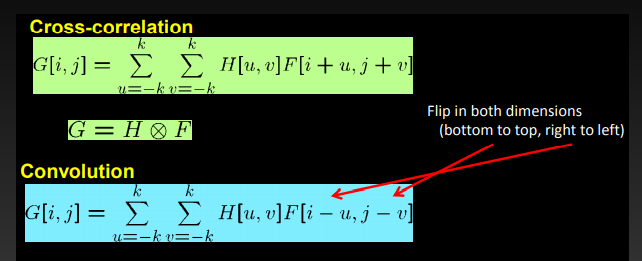
### NOTE : Many machine learning libraries implement cross-correlation but call it convolution

### Relation Between Input and Output : CNN
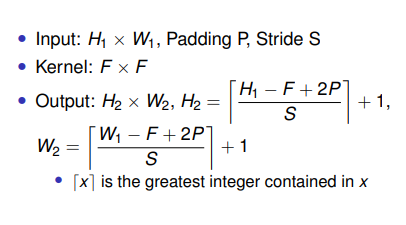

### Example : Input and Fiter Operation
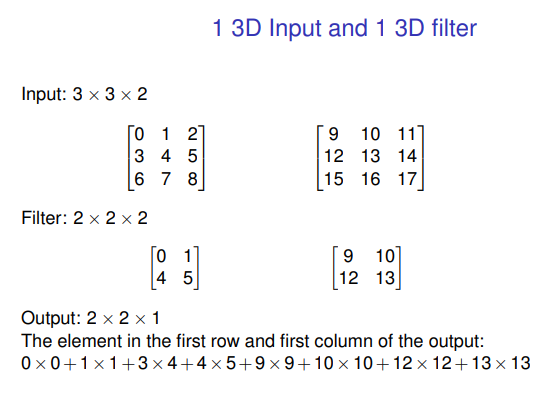

### Parameters
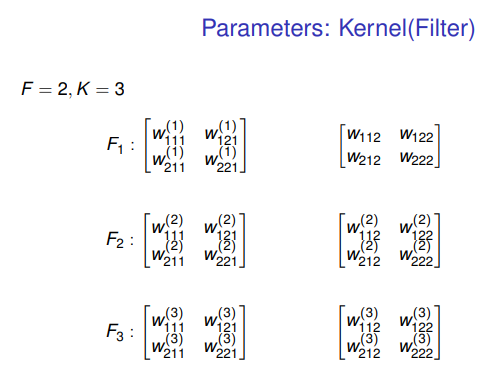

## Filters

### Breaking up an Image

The first step for a CNN is to break up the image into smaller pieces. We do this by selecting a width and height that defines a filter.

The filter looks at small pieces, or patches, of the image. These patches are the same size as the filter. 

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377d67_vlcsnap-2016-11-24-15h52m47s438/vlcsnap-2016-11-24-15h52m47s438.png" width=600 height=400>
<center>A CNN uses filters to split an image into smaller patches. The size of these patches matches the filter size.</center>

We then simply slide this filter horizontally or vertically to focus on a different piece of the image.

The amount by which the filter slides is referred to as the **'stride'**. The stride is a hyperparameter which the engineer can tune. Increasing the stride reduces the size of your model by reducing the number of total patches each layer observes. However, this usually comes with a reduction in accuracy.

Let’s look at an example. In this zoomed in image of the dog, we first start with the patch outlined in red. The width and height of our filter define the size of this square.

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840fdac_retriever-patch/retriever-patch.png" width=500 height=500>

We then move the square over to the right by a given stride (2 in this case) to get another patch.

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840fe04_retriever-patch-shifted/retriever-patch-shifted.png" width=500 height=500>
<center>We move our square to the right by two pixels to create another patch.</center>

What's important here is that we are **grouping together adjacent pixels** and treating them as a collective.

In a normal, non-convolutional neural network, we would have ignored this adjacency. In a normal network, we would have connected every pixel in the input image to a neuron in the next layer. In doing so, we would not have taken advantage of the fact that pixels in an image are close together for a reason and have special meaning.

By taking advantage of this local structure, our CNN learns to classify local patterns, like shapes and objects, in an image.

### Filter Depth

It's common to have more than one filter. Different filters pick up different qualities of a patch. For example, one filter might look for a particular color, while another might look for a kind of object of a specific shape. The amount of filters in a convolutional layer is called the **filter depth**.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377e4f_neilsen-pic/neilsen-pic.png)
<center>In the above example, a patch is connected to a neuron in the next layer. Source: MIchael Neilsen.</center>

How many neurons does each patch connect to?

That’s dependent on our filter depth. If we have a depth of `k`, we connect each patch of pixels to `k` neurons in the next layer. This gives us the height of `k` in the next layer, as shown below. In practice, `k` is a hyperparameter we tune, and most CNNs tend to pick the same starting values.

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/5840ffda_filter-depth/filter-depth.png" width="300" height="500">
<center>Choosing a filter depth of k connects each path to k neurons in the next layer</center>

But why connect a single patch to multiple neurons in the next layer? Isn’t one neuron good enough?

Multiple neurons can be useful because a patch can have multiple interesting characteristics that we want to capture.

For example, one patch might include some white teeth, some blonde whiskers, and part of a red tongue. In that case, we might want a filter depth of at least three - one for each of teeth, whiskers, and tongue.

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584104c8_teeth-whiskers-tongue/teeth-whiskers-tongue.png" width="350" height="400">
<center>This patch of the dog has many interesting features we may want to capture. These include the presence of teeth, the presence of whiskers, and the pink color of the tongue.</center>

Having multiple neurons for a given patch ensures that our CNN can learn to capture whatever characteristics the CNN learns are important.

Remember that the CNN isn't "programmed" to look for certain characteristics. Rather, it **learns on its own** which characteristics to notice.

## Parameters

### Parameter Sharing

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58377f77_vlcsnap-2016-11-24-16h01m35s262/vlcsnap-2016-11-24-16h01m35s262.png" width=600 height=400>
<center>The weights, w, are shared across patches for a given layer in a CNN to detect the cat above regardless of where in the image it is located.</center>

When we are trying to classify a picture of a cat, we don’t care where in the image a cat is. If it’s in the top left or the bottom right, it’s still a cat in our eyes. We would like our CNNs to also possess this ability known as translation invariance. How can we achieve this?

As we saw earlier, the classification of a given patch in an image is determined by the weights and biases corresponding to that patch.

If we want a cat that’s in the top left patch to be classified in the same way as a cat in the bottom right patch, we need the weights and biases corresponding to those patches to be the same, so that they are classified the same way.

This is exactly what we do in CNNs. The weights and biases we learn for a given output layer are shared across all patches in a given input layer. Note that as we increase the depth of our filter, the number of weights and biases we have to learn still increases, as the weights aren't shared across the output channels.

There’s an additional benefit to sharing our parameters. If we did not reuse the same weights across all patches, we would have to learn new parameters for every single patch and hidden layer neuron pair. This does not scale well, especially for higher fidelity images. Thus, sharing parameters not only helps us with translation invariance, but also gives us a smaller, more scalable model.

### Padding

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5837d4d5_screen-shot-2016-11-24-at-10.05.37-pm/screen-shot-2016-11-24-at-10.05.37-pm.png)
<center>A 5x5 grid with a 3x3 filter. Source: Andrej Karpathy.</center>

Let's say we have a `5x5` grid (as shown above) and a filter of size `3x3` with a stride of `1`. What's the width and height of the next layer? We see that we can fit at most three patches in each direction, giving us a dimension of `3x3` in our next layer. As we can see, the width and height of each subsequent layer decreases in such a scheme.

In an ideal world, we'd be able to maintain the same width and height across layers so that we can continue to add layers without worrying about the dimensionality shrinking and so that we have consistency. How might we achieve this? One way is to simple add a border of `0`s to our original `5x5` image. You can see what this looks like in the below image:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5837d4ee_screen-shot-2016-11-24-at-10.05.46-pm/screen-shot-2016-11-24-at-10.05.46-pm.png)
<center>The same grid with 0 padding. Source: Andrej Karpathy.</center>

This would expand our original image to a `7x7`. With this, we now see how our next layer's size is again a `5x5`, keeping our dimensionality consistent.

### Dimensionality

From what we've learned so far, how can we calculate the number of neurons of each layer in our CNN?

Given our input layer has a volume of `W`, our filter has a volume `(height * width * depth)` of `F`, we have a stride of `S`, and a padding of `P`, the following formula gives us the volume of the next layer: `(W−F+2P)/S+1`.

Knowing the dimensionality of each additional layer helps us understand how large our model is and how our decisions around filter size and stride affect the size of our network

## Visualizing CNNs

Let’s look at an example CNN to see how it works in action.

The CNN we will look at is trained on ImageNet as described in [this paper](http://www.matthewzeiler.com/pubs/arxive2013/eccv2014.pdf) by Zeiler and Fergus. In the images below (from the same paper), we’ll see what each layer in this network detects and see *how* each layer detects more and more complex ideas.

### Layer 1

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbd42_layer-1-grid/layer-1-grid.png)
<center>Example patterns that cause activations in the first layer of the network. These range from simple diagonal lines (top left) to green blobs (bottom middle).</center>

The images above are from Matthew Zeiler and Rob Fergus' [deep visualization toolbox](https://www.youtube.com/watch?v=ghEmQSxT6tw), which lets us visualize what each layer in a CNN focuses on.

Each image in the above grid represents a pattern that causes the neurons in the first layer to activate - in other words, they are patterns that the first layer recognizes. The top left image shows a -45 degree line, while the middle top square shows a +45 degree line. These squares are shown below again for reference:

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbba2_diagonal-line-1/diagonal-line-1.png)
<center>As visualized here, the first layer of the CNN can recognize -45 degree lines.</center>
<br>

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbc02_diagonal-line-2/diagonal-line-2.png)
<center>The first layer of the CNN is also able to recognize +45 degree lines, like the one above.</center>

Let's now see some example images that cause such activations. The below grid of images all activated the -45 degree line. Notice how they are all selected despite the fact that they have different colors, gradients, and patterns.

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583cbace_grid-layer-1/grid-layer-1.png)
<center>Example patches that activate the -45 degree line detector in the first layer.</center>

So, the first layer of our CNN clearly picks out very simple shapes and patterns like lines and blobs.

### Layer 2

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/583780f3_screen-shot-2016-11-24-at-12.09.02-pm/screen-shot-2016-11-24-at-12.09.02-pm.png" width=700 height=700>
<center>A visualization of the second layer in the CNN. Notice how we are picking up more complex ideas like circles and stripes. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</center>

The second layer of the CNN captures complex ideas.

As you see in the image above, the second layer of the CNN recognizes circles (second row, second column), stripes (first row, second column), and rectangles (bottom right).

**The CNN learns to do this on its own**. There is no special instruction for the CNN to focus on more complex objects in deeper layers. That's just how it normally works out when you feed training data into a CNN.

### Layer 3

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/5837811f_screen-shot-2016-11-24-at-12.09.24-pm/screen-shot-2016-11-24-at-12.09.24-pm.png" width=700 height=700>
<center>A visualization of the third layer in the CNN. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</center>

The third layer picks out complex combinations of features from the second layer. These include things like grids, and honeycombs (top left), wheels (second row, second column), and even faces (third row, third column).

### Layer 5

<img src="https://d17h27t6h515a5.cloudfront.net/topher/2016/November/58378151_screen-shot-2016-11-24-at-12.08.11-pm/screen-shot-2016-11-24-at-12.08.11-pm.png" width=500 height=500>
<center>A visualization of the fifth and final layer of the CNN. The gray grid on the left represents how this layer of the CNN activates (or "what it sees") based on the corresponding images from the grid on the right.</center>

We'll skip layer 4, which continues this progression, and jump right to the fifth and final layer of this CNN.

The last layer picks out the highest order ideas that we care about for classification, like dog faces, bird faces, and bicycles. 

## TensorFlow Convolution Layer

Let's examine how to implement a CNN in TensorFlow.

TensorFlow provides the `tf.nn.conv2d()` and `tf.nn.bias_add()` functions to create your own convolutional layers.

In [1]:
import tensorflow as tf

# Output depth
k_output = 64

# Image Properties
image_width = 10
image_height = 10
color_channels = 3

# Convolution filter
filter_size_width = 5
filter_size_height = 5

# Input/Image
input = tf.placeholder(
    tf.float32,
    shape=[None, image_height, image_width, color_channels])

# Weight and bias
weight = tf.Variable(tf.truncated_normal(
    [filter_size_height, filter_size_width, color_channels, k_output]))
bias = tf.Variable(tf.zeros(k_output))

# Apply Convolution
conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME')
# Add bias
conv_layer = tf.nn.bias_add(conv_layer, bias)
# Apply activation function
conv_layer = tf.nn.relu(conv_layer)

The code above uses the `tf.nn.conv2d()` function to compute the convolution with `weight` as the filter and `[1, 2, 2, 1]` for the strides. TensorFlow uses a stride for each `input` dimension, `[batch, input_height, input_width, input_channels]`. We are generally always going to set the stride for `batch` and `input_channels `(i.e. the first and fourth element in the strides array) to be `1`.

You'll focus on changing `input_height` and `input_width` while setting batch and `input_channels` to `1`. The `input_height` and `input_width` strides are for striding the filter over `input`. This example code uses a stride of 2 with 5x5 filter over `input`.

The `tf.nn.bias_add()` function adds a 1-d bias to the last dimension in a matrix.

## Advanced Covnet-ology

## TensorFlow Max Pooling

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/582aac09_max-pooling/max-pooling.png)


The image above is an example of max pooling with a 2x2 filter and stride of 2. The four 2x2 colors represent each time the filter was applied to find the maximum value.

For example, `[[1, 0], [4, 6]]` becomes `6`, because `6` is the maximum value in this set. Similarly, `[[2, 3], [6, 8]]` becomes `8`.

Conceptually, the benefit of the max pooling operation is to reduce the size of the input, and allow the neural network to focus on only the most important elements. Max pooling does this by only retaining the maximum value for each filtered area, and removing the remaining values.

TensorFlow provides the `tf.nn.max_pool()` function to apply max pooling to your convolutional layers.

In [2]:
...
conv_layer = tf.nn.conv2d(input, weight, strides=[1, 2, 2, 1], padding='SAME')
conv_layer = tf.nn.bias_add(conv_layer, bias)
conv_layer = tf.nn.relu(conv_layer)
# Apply Max Pooling
conv_layer = tf.nn.max_pool(
    conv_layer,
    ksize=[1, 2, 2, 1],
    strides=[1, 2, 2, 1],
    padding='SAME')

The `tf.nn.max_pool()` function performs max pooling with the `ksize` parameter as the size of the filter and the `strides` parameter as the length of the stride. 2x2 filters with a stride of 2x2 are common in practice.

The `ksize` and `strides` parameters are structured as 4-element lists, with each element corresponding to a dimension of the input tensor (`[batch, height, width, channels]`). For both `ksize` and `strides`, the `batch` and `channel` dimensions are typically set to `1`.

## 1x1 Convolutions

#### [1x1 Convolutions Video](https://www.youtube.com/watch?v=Zmzgerm6SjA)

## Inception Module

#### [Inception Module Video](https://www.youtube.com/watch?v=SlTm03bEOxA)

## Convolutional Network in TensorFlow

It's time to walk through an example Convolutional Neural Network (CNN) in TensorFlow.

The structure of this network follows the classic structure of CNNs, which is a mix of convolutional layers and max pooling, followed by fully-connected layers.

The code we'll be looking at is similar to what we saw in the segment on Deep Neural Network in TensorFlow, except we'll restructured the architecture of this network as a CNN.

Just like in that segment, here we'll study the line-by-line breakdown of the code. [Link to download the code and run it.](https://d17h27t6h515a5.cloudfront.net/topher/2017/February/58a61ca1_cnn/cnn.zip)

### Dataset

We've seen this section of code from previous lessons. Here we're importing the MNIST dataset and using a convenient TensorFlow function to batch, scale, and One-Hot encode the data.

In [9]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets(".", one_hot=True, reshape=False)

import tensorflow as tf

# Parameters
learning_rate = 0.00001
epochs = 1
batch_size = 128

# Number of samples to calculate validation and accuracy
# Decrease this if you're running out of memory to calculate accuracy
test_valid_size = 256

# Network Parameters
n_classes = 10  # MNIST total classes (0-9 digits)
dropout = 0.75  # Dropout, probability to keep units

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


### Weights and Biases

In [10]:
# Store layers weight & bias
weights = {
    'wc1': tf.Variable(tf.random_normal([5, 5, 1, 32])),
    'wc2': tf.Variable(tf.random_normal([5, 5, 32, 64])),
    'wd1': tf.Variable(tf.random_normal([7*7*64, 1024])),
    'out': tf.Variable(tf.random_normal([1024, n_classes]))}

biases = {
    'bc1': tf.Variable(tf.random_normal([32])),
    'bc2': tf.Variable(tf.random_normal([64])),
    'bd1': tf.Variable(tf.random_normal([1024])),
    'out': tf.Variable(tf.random_normal([n_classes]))}

### Convolutions

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581a58be_convolution-schematic/convolution-schematic.gif)
<centre>Convolution with 3×3 Filter. Source: http://deeplearning.stanford.edu/wiki/index.php/Feature_extraction_using_convolution</centre>

The above is an example of a convolution with a 3x3 filter and a stride of 1 being applied to data with a range of 0 to 1. The convolution for each 3x3 section is calculated against the weight, `[[1, 0, 1], [0, 1, 0], [1, 0, 1]]`, then a bias is added to create the convolved feature on the right. In this case, the bias is zero. In TensorFlow, this is all done using `tf.nn.conv2d()` and `tf.nn.bias_add()`.

In [11]:
def conv2d(x, W, b, strides=1):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

The `tf.nn.conv2d()` function computes the convolution against weight `W` as shown above.

In TensorFlow, stride is an array of 4 elements; the first element in the stride array indicates the stride for batch and last element indicates stride for features. It's good practice to remove the batches or features you want to skip from the data set rather than use stride to skip them. You can always set the first and last element to 1 in stride in order to use all batches and features.

The middle two elements are the strides for height and width respectively. I've mentioned stride as one number because you usually have a square stride where `height = width`. When someone says they are using a stride of 3, they usually mean `tf.nn.conv2d(x, W, strides=[1, 3, 3, 1])`.

To make life easier, the code is using `tf.nn.bias_add()` to add the bias. Using `tf.add()` doesn't work when the tensors aren't the same shape.

### Max Pooling

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581a57fe_maxpool/maxpool.jpeg)
<centre>Max Pooling with 2x2 filter and stride of 2. Source: http://cs231n.github.io/convolutional-networks/</centre>

The above is an example of max pooling with a 2x2 filter and stride of 2. The left square is the input and the right square is the output. The four 2x2 colors in input represents each time the filter was applied to create the max on the right side. For example, `[[1, 1], [5, 6]]` becomes `6` and `[[3, 2], [1, 2]]` becomes `3`.

In [12]:
def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

The `tf.nn.max_pool()` function does exactly what you would expect, it performs max pooling with the `ksize` parameter as the size of the filter.

### Model

![](https://d17h27t6h515a5.cloudfront.net/topher/2016/November/581a64b7_arch/arch.png)

### LeNet5 Architecture
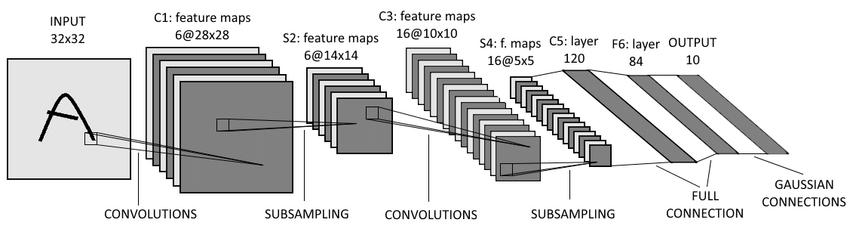

### LeNet5 Calculations
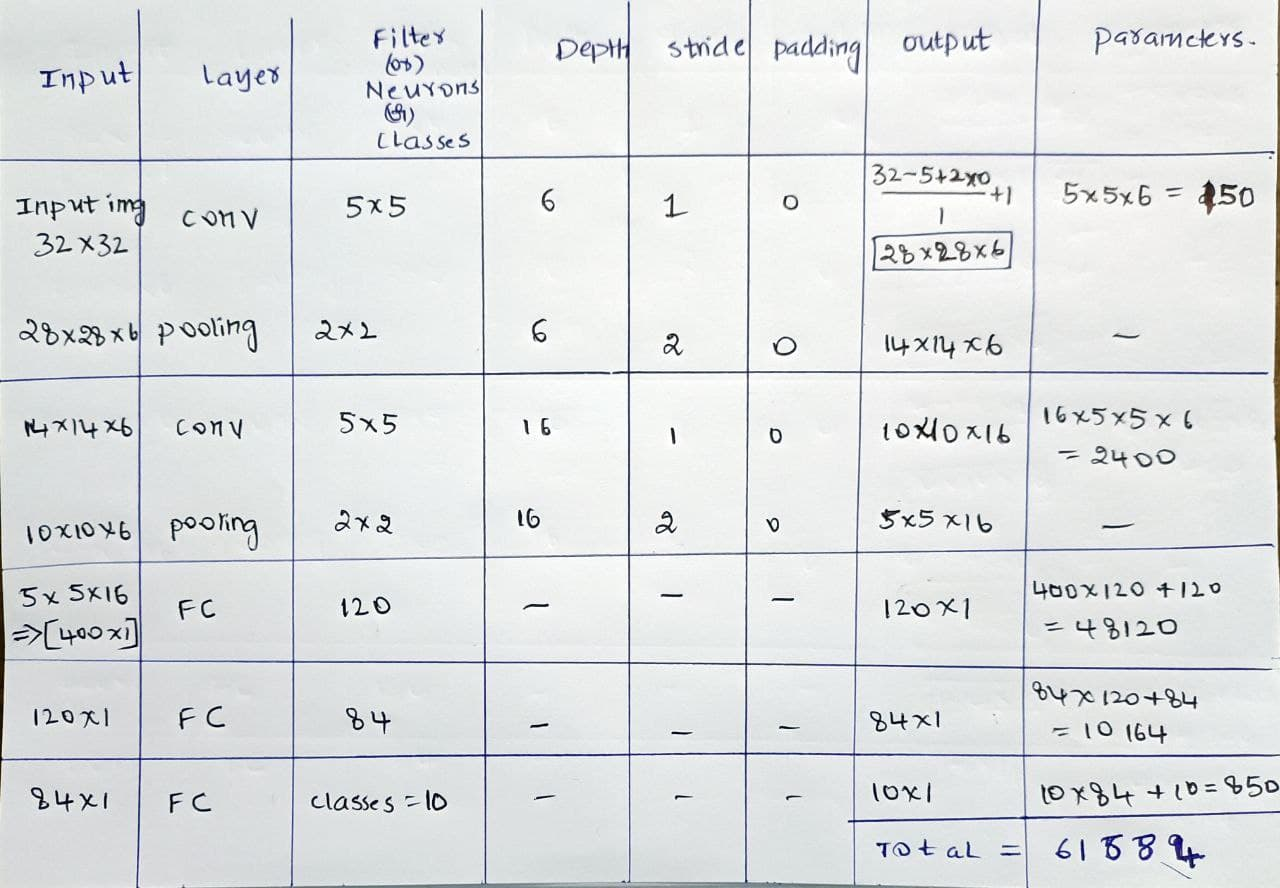

In the code below, we're creating 3 layers alternating between convolutions and max pooling followed by a fully connected and output layer. The transformation of each layer to new dimensions are shown in the comments. For example, the first layer shapes the images from 28x28x1 to 28x28x32 in the convolution step. Then next step applies max pooling, turning each sample into 14x14x32. All the layers are applied from `conv1` to `output`, producing 10 class predictions.

In [13]:
def conv_net(x, weights, biases, dropout):
    # Layer 1 - 28*28*1 to 14*14*32
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    conv1 = maxpool2d(conv1, k=2)

    # Layer 2 - 14*14*32 to 7*7*64
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    conv2 = maxpool2d(conv2, k=2)

    # Fully connected layer - 7*7*64 to 1024
    fc1 = tf.reshape(conv2, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, dropout)

    # Output Layer - class prediction - 1024 to 10
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

### Session

Now we can run it!

In [14]:
# tf Graph input
x = tf.placeholder(tf.float32, [None, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, n_classes])
keep_prob = tf.placeholder(tf.float32)

# Model
logits = conv_net(x, weights, biases, keep_prob)

# Define loss and optimizer
cost = tf.reduce_mean(\
    tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
    .minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing the variables
init = tf. global_variables_initializer()

# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    for epoch in range(epochs):
        for batch in range(mnist.train.num_examples//batch_size):
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: dropout})

            # Calculate batch loss and accuracy
            loss = sess.run(cost, feed_dict={
                x: batch_x,
                y: batch_y,
                keep_prob: 1.})
            valid_acc = sess.run(accuracy, feed_dict={
                x: mnist.validation.images[:test_valid_size],
                y: mnist.validation.labels[:test_valid_size],
                keep_prob: 1.})

            print('Epoch {:>2}, Batch {:>3} -'
                  'Loss: {:>10.4f} Validation Accuracy: {:.6f}'.format(
                epoch + 1,
                batch + 1,
                loss,
                valid_acc))

    # Calculate Test Accuracy
    test_acc = sess.run(accuracy, feed_dict={
        x: mnist.test.images[:test_valid_size],
        y: mnist.test.labels[:test_valid_size],
        keep_prob: 1.})
    print('Testing Accuracy: {}'.format(test_acc))

Epoch  1, Batch   1 -Loss: 111744.7109 Validation Accuracy: 0.093750
Epoch  1, Batch   2 -Loss: 67202.3359 Validation Accuracy: 0.109375
Epoch  1, Batch   3 -Loss: 47169.2031 Validation Accuracy: 0.128906
Epoch  1, Batch   4 -Loss: 33749.8672 Validation Accuracy: 0.140625
Epoch  1, Batch   5 -Loss: 31741.6973 Validation Accuracy: 0.140625
Epoch  1, Batch   6 -Loss: 29342.8477 Validation Accuracy: 0.160156
Epoch  1, Batch   7 -Loss: 28273.4082 Validation Accuracy: 0.152344
Epoch  1, Batch   8 -Loss: 27469.5625 Validation Accuracy: 0.167969
Epoch  1, Batch   9 -Loss: 25588.3848 Validation Accuracy: 0.167969
Epoch  1, Batch  10 -Loss: 20927.6055 Validation Accuracy: 0.171875
Epoch  1, Batch  11 -Loss: 21317.8477 Validation Accuracy: 0.179688
Epoch  1, Batch  12 -Loss: 18316.5645 Validation Accuracy: 0.171875
Epoch  1, Batch  13 -Loss: 18508.5449 Validation Accuracy: 0.183594
Epoch  1, Batch  14 -Loss: 17032.8652 Validation Accuracy: 0.187500
Epoch  1, Batch  15 -Loss: 16483.7871 Validatio

We can further improve the accuracy by increasing the epochs.